In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import re
import os.path

In [3]:
# test result function
def frobenius_norm(M1, M2):
    #print M1
    #print M2
    total = 0.0
    for a,b in zip(M1, M2):
        for c, d in zip(a, b):
            total += (c - d)*(c - d)
    return total

In [6]:
# dimension of each example in the dataset
d = 15
# k is the top pricipal calculated by the eigenvectors, right now just fix it
k = 5
# fix the learning rate
#learning_rate = 0.00001
learning_rate = 0.00000000001
#learning_rate = 0.0000000000001
# preprocess the data
data_set = []
data_set_done = []
if os.path.exists('new_data'):
    with open('new_data') as data:
        for line in data:
            data_set_done.append(map(float, line.split()))

else:
    with open('adult.data.txt') as data:
        for line in data:
            # '\s' matches whitespace
            tmp = re.sub(r'\s', '', line).split(',')
            data_set.append(tmp)
    print data_set

    feature_vector_size = len(data_set[0])
    print "feature vector is  " ,feature_vector_size
    print "data set size is ", len(data_set)
    tmp = data_set[0]

    # find out which feature is not a digit
    non_digit_index = []
    for i in range (0,feature_vector_size):
        if tmp[i].isdigit():
            continue
        else:
            non_digit_index.append(i)
    print non_digit_index

    # make each string feature to become a number

    # Copy
    modified_data_set= []
    for item in data_set:
        modified_data_set.append(item)


    print "data before processed dimension is ", len(modified_data_set[0])
    #print modified_data_set
    item_list = []
    count = 0
    dimension_to_increase = 0
    # for all the non_digit index, count how many differnt items
    for i in non_digit_index:
        # clear the item list to find different string for same feature
        items = []
        # loop through the whole data set
        for vector in data_set:
            # get the corresponsding item
            tmp = vector[i]
            # it already in the list
            if tmp in items:
                continue
            else:
                # otherwise append to the list
                items.append(tmp)
        dimension_to_increase = dimension_to_increase + len(items)-1
        #print "item is "
        #print items
        #print "\n\n"
        # loop through the whole data set to replace the feature
        for j in range(len(modified_data_set)):
            v = modified_data_set[j]
            #print v
            # get the item in the vector
            #print "accessing ", i+count
            tmp = v[i+count]
            index  = items.index(tmp)
            front = v[0:i+count]
            end = v[i+1+count:len(v)]
            zeros = [0]*len(items)
            zeros[index] = 1
            front.extend(zeros)
            front.extend(end)
            modified_data_set[j] = front
            #print "result is ", modified_data_set[j]
            #v[i] = float(index)
        count = count + len(items)-1
    for v in modified_data_set:
        v = map(float, v)
        data_set_done.append(v)
    print "dimension to increase ", dimension_to_increase
    print "data processed dimension is ", len(data_set_done[0])
    #print data_set_done
    print "size of data set done is ", len(data_set_done)

f = open('new_data', 'w')
for vector in data_set_done:
    for num in vector:
        f.write(str(num)+" ")
    f.write("\n")
f.close()

In [11]:
# U and V are d x k dimension matrix
v = np.random.rand(len(data_set_done[0]),k)
#print "V start with, ", v
u = np.random.rand(len(data_set_done[0]),k)
#print "U start with, ", u

# data set size covariance matrix M
N = len(data_set_done)
M = np.array(data_set_done[0]) * np.transpose(np.array(data_set_done[0])) / N
for i in range(1, len(data_set_done)):
    M = M + (np.array([data_set_done[i]]) * np.transpose(np.array([data_set_done[i]]))) / N
print "M is "
print M

U, s, V = np.linalg.svd(M, full_matrices=True)

print "U is", U
print "V is", V
distance = []
S=np.diag(s)
optimal = frobenius_norm(M, np.dot(U, np.dot(S,V)))
print "optimal is ", optimal
#distance.append(frobenius_norm(M, np.dot(U, np.dot(S,V))))
#distance.append(frobenius_norm(M, np.dot(U, np.dot(s,V))

print distance

# SGD function
# run the whole optimization process 10 times
for j in range(0, 1000):
    for t in range(0, 100):
            #print (data_set[t] * np.transpose(data_set[t]) - np.dot(u,np.transpose(v)))
            # need to do np.dot() for matrix multiplication
        u = u + learning_rate * np.dot(M - np.dot(u,np.transpose(v)), v)
        #u = u - learning_rate * np.dot((data_set_done[t] * np.transpose(data_set_done[t]) - np.dot(u,np.transpose(v))), v)
            #print "u is"
            #print u
    # do v 100 rounds
    #for counter in range (0,10):
        #print counter
        # update v len(data_set) iterations
    for t in range(0, 100):
        v = v + learning_rate * np.dot(M - np.dot(u, np.transpose(v)), u)
        #v = v - learning_rate * np.dot((data_set_done[t] * np.transpose(data_set_done[t]) - np.dot(u, np.transpose(v))), u)
            #print "v is "
            #print v
#     print "u is"
#     print u
#     print "v is"
#     print v
    # print "result is"

    # print np.dot(u, np.transpose(v))
    result = frobenius_norm(M, np.dot(u,np.transpose(v)))
    print result
    distance.append(result)
#print distance

M is 
[[  1.67459915e+03   1.57089770e+00   3.50935168e+00 ...,   9.82770799e-04
    2.79246952e+01   1.06557845e+01]
 [  1.61757931e+00   3.98636406e-02   0.00000000e+00 ...,   0.00000000e+00
    2.90224502e-02   1.08411904e-02]
 [  3.55606400e+00   3.07115875e-05   7.80381438e-02 ...,   0.00000000e+00
    5.58336660e-02   2.22351893e-02]
 ..., 
 [  4.76950954e-02   3.07115875e-05   0.00000000e+00 ...,   3.07115875e-05
    6.14231750e-05   0.00000000e+00]
 [  2.79713768e+01   2.90224502e-02   5.58029545e-02 ...,   3.07115875e-05
    7.59190443e-01   0.00000000e+00]
 [  1.07024969e+01   1.08719020e-02   2.22351893e-02 ...,   0.00000000e+00
    3.07115875e-05   2.40809557e-01]]
U is [[ -1.56841556e-04   3.17045638e-04   7.20913416e-03 ...,   1.18072110e-12
   -9.51133703e-14   2.99908969e-13]
 [ -4.06882956e-06  -1.20660989e-05  -3.86982547e-04 ...,   8.07970228e-02
    1.00623306e-01  -4.48662964e-02]
 [ -4.20383885e-06  -1.03951195e-05  -3.64252014e-04 ...,   8.07970224e-02
    1.0062

1000


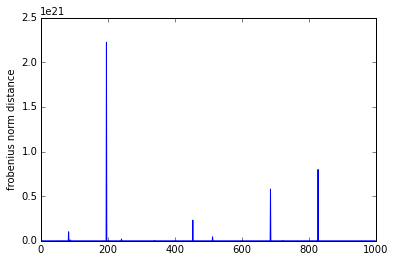

In [12]:
#print distance
# plot the distance 
x_axis = random.sample(distance,1000)
    
print len(x_axis)
'''
print len(x_axis)
print len(distance)
plt.plot(x_axis,distance)
plt.xlim(0,200000)
plt.ylim(0,4000000)
'''
plt.plot(x_axis)
plt.ylabel('frobenius norm distance')
plt.show()

In [13]:
# SGD Version
N = len(data_set_done)
distance = []
#Stochastic gradient descent(SGD)
#Apply random permutation to the data
permutated_data = np.random.permutation(data_set_done)
print permutated_data[0]
index = 0
#print permutated_data
converged = False
last_distance = 0.0
for i in range(0, 100):
    index = (index + 1) % N
    #M = np.array(permutated_data[index]) * np.transpose(np.array(permutated_data[index]))
    M = np.array([permutated_data[index]]) * np.transpose(np.array([permutated_data[index]]))
    for t in range(0, 100):
        u = u + learning_rate * np.dot(M - np.dot(u,np.transpose(v)), v)
    for t in range(0, 100):
        v = v + learning_rate * np.dot(M - np.dot(u, np.transpose(v)), u)
    #print np.dot(u, np.transpose(v))
    result = frobenius_norm(M, np.dot(u,np.transpose(v)))
    print result
    if abs(result-last_distance) < 0.001:
        print "converged"
        converged = True
    last_distance = result
    distance.append(result)
print distance

[  2.90000000e+01   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.14925000e+05   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.40000000e+01
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00

/Users/ruiqingqiu/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: invalid value encountered in add


In [14]:
# Gamma distribution, generating noise
def length(data):
    sum = 0.0
    for i in data:
        sum += i * i
    return math.sqrt(sum)

# Normalize all data
for data in data_set_done:
    print length(data)

d = len(data_set_done[0]) #shape
theta = 2
s = np.random.gamma(d, 2, d)

print s

77546.5010881
83311.0170866
215646.007267
234721.009516
338409.003785
284582.005577
160187.0084
209642.011493
47898.4622196
159533.064996
280464.014045
141297.009476
122272.006571
205019.008967
121772.013673
245487.00653
176756.005488
186824.007264
28887.0692698
292175.00698
193524.01412
302146.005636
76845.0186024
117054.827495
109015.023717
216851.01133
168294.006094
180211.018381
367260.010906
193366.010578
190709.008877
266015.004596
386942.566626
59951.0217594
311512.001313
242406.008172
197200.005451
544091.000989
84154.0149369
265477.007641
507875.0028
88506.0259135
172987.009405
94638.0216139
289980.003345
337895.007439
144361.015042
128354.014573
101603.016786
271466.005194
32275.036158
226956.002895
51869.9418932
251585.011334
109832.026855
237993.007475
216666.008617
56352.0262191
147372.013826
188212.778724
59544.6919801
293936.004506
149640.013345
116632.017379
105598.020427
155537.009599
183175.006805
169846.013244
191681.013069
200681.005815
101509.007359
309974.004418
1